In [1]:
from sklearn import datasets, linear_model, metrics, preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time
from math import e
#ustawienia
time_multiplicator = 100
seed = 244810
samples = 2410

def norm(x):    
    for i in range(x.shape[1]):
        x_min = np.min(x[:,i])
        x_max = np.max(x[:,i])

        x[:,i] = (x[:,i] - x_min)/(x_max - x_min)

    return x

In [2]:
moons, moons_c = datasets.make_moons(n_samples=samples, noise = 0.1, random_state=seed)

M_train, M_test, mc_train, mc_test = train_test_split(moons, moons_c, test_size=0.2, random_state=0)

# M_train = norm(M_train)
# M_test = norm(M_test)

In [3]:
M_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_train)
M_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(M_test)

In [4]:
sk_model= linear_model.LogisticRegression()
sk_model.fit(M_train,mc_train)


LogisticRegression()

In [11]:
xmin = np.min(M_test[:,0])
xmax = np.max(M_test[:,0])
ymin = np.min(M_test[:,1])
ymax = np.max(M_test[:,1])

In [12]:
xx, yy = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]

mesh = PolynomialFeatures(degree=3, include_bias=False).fit_transform(mesh)

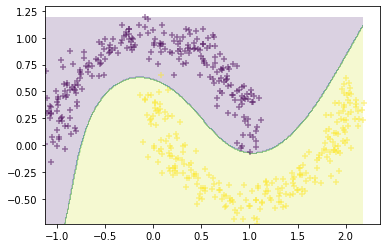

In [13]:
ans = sk_model.predict(mesh).reshape(xx.shape)
plt.contourf(xx,yy,ans, alpha=0.2)
plt.scatter(M_test[:,0],M_test[:,1], c=mc_test,marker="+", alpha=0.5)
